In [1]:
import csv
import numpy as np
import os
import pandas as pd
import math

In [3]:
user_app_usage_appId = pd.read_csv('user_app_usage.csv', header=None, usecols=[1])
user_app_usage_appId.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651007719 entries, 0 to 651007718
Data columns (total 1 columns):
1    object
dtypes: object(1)
memory usage: 4.9+ GB


In [4]:
user_app_usage_appId.head()

,1
0,a00289850
1,a00287085
2,a00289826
3,a00287085
4,a00278858


In [17]:
user_app_usage_appId_counts = user_app_usage_appId[1].value_counts()

In [21]:
user_app_usage_appId_sorted = user_app_usage_appId_counts.sort_values(ascending=False)

In [22]:
user_app_usage_appId_top100 = user_app_usage_appId_sorted[0:100]

In [23]:
print(user_app_usage_appId_top100)

a00289791    49079610
a00103666    31515334
a00289826    28448010
a00287085    24253429
a00278905    13248005
a0048562     13073043
a00289850    12223354
a0046242     11453925
a00170432    11102231
a00278858     9236933
a00290015     8831052
a0030644      8050605
a00247519     7742879
a00271087     7715735
a0048332      7486823
a00109386     7074295
a00289866     6744088
a00292780     6172634
a00224427     6036913
a00290027     5674584
a00187480     5519001
a00261220     5481572
a0021880      5381422
a00274701     4913313
a00348507     4575315
a00292472     4408465
a00336224     4224160
a00289511     3936880
a0022276      3902781
a0071100      3610707
               ...   
a0032847      1397587
a00169965     1364477
a0075197      1337470
a00294247     1309385
a00331594     1272084
a00278867     1265099
a00278912     1231270
a00160089     1228474
a00261226     1226551
a00219676     1062279
a0049622      1061607
a0082007      1055791
a00239261     1052762
a0048452      1026843
a00348136 

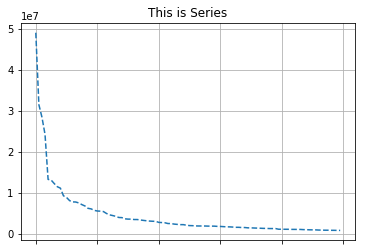

In [33]:
user_app_usage_appId_sorted[0:100].plot(kind='line', grid=True, label='S1',title='This is Series', style='--')

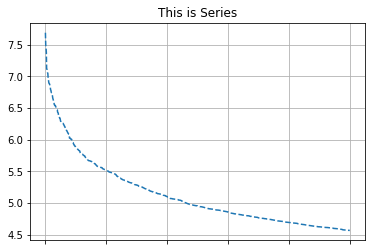

In [39]:
user_app_usage_appId_sorted[0:1000].apply(lambda x: math.log10(x)).plot(kind='line', grid=True, label='S1',title='This is Series', style='--')

In [53]:
top100List = list(user_app_usage_appId_top100.index)
print(top100List)

['a00289791', 'a00103666', 'a00289826', 'a00287085', 'a00278905', 'a0048562', 'a00289850', 'a0046242', 'a00170432', 'a00278858', 'a00290015', 'a0030644', 'a00247519', 'a00271087', 'a0048332', 'a00109386', 'a00289866', 'a00292780', 'a00224427', 'a00290027', 'a00187480', 'a00261220', 'a0021880', 'a00274701', 'a00348507', 'a00292472', 'a00336224', 'a00289511', 'a0022276', 'a0071100', 'a00311680', 'a00481059', 'a0036392', 'a00275200', 'a00278849', 'a00157201', 'a00244790', 'a00263057', 'a00289519', 'a00331160', 'a00287057', 'a0048522', 'a009932', 'a00307756', 'a0048467', 'a00217423', 'a00363352', 'a00166554', 'a00299200', 'a0027551', 'a003925', 'a0092898', 'a0064339', 'a00144187', 'a0048637', 'a00461814', 'a00271777', 'a00373197', 'a00157220', 'a00289728', 'a00141402', 'a0071095', 'a00276196', 'a00290038', 'a0082383', 'a00324307', 'a00299316', 'a0099559', 'a00336168', 'a00281804', 'a0032847', 'a00169965', 'a0075197', 'a00294247', 'a00331594', 'a00278867', 'a00278912', 'a00160089', 'a002612

In [10]:
top100List = ['a00289791', 'a00103666', 'a00289826', 'a00287085', 'a00278905', 'a0048562', 'a00289850', 'a0046242', 'a00170432', 'a00278858', 'a00290015', 'a0030644', 'a00247519', 'a00271087', 'a0048332', 'a00109386', 'a00289866', 'a00292780', 'a00224427', 'a00290027', 'a00187480', 'a00261220', 'a0021880', 'a00274701', 'a00348507', 'a00292472', 'a00336224', 'a00289511', 'a0022276', 'a0071100', 'a00311680', 'a00481059', 'a0036392', 'a00275200', 'a00278849', 'a00157201', 'a00244790', 'a00263057', 'a00289519', 'a00331160', 'a00287057', 'a0048522', 'a009932', 'a00307756', 'a0048467', 'a00217423', 'a00363352', 'a00166554', 'a00299200', 'a0027551', 'a003925', 'a0092898', 'a0064339', 'a00144187', 'a0048637', 'a00461814', 'a00271777', 'a00373197', 'a00157220', 'a00289728', 'a00141402', 'a0071095', 'a00276196', 'a00290038', 'a0082383', 'a00324307', 'a00299316', 'a0099559', 'a00336168', 'a00281804', 'a0032847', 'a00169965', 'a0075197', 'a00294247', 'a00331594', 'a00278867', 'a00278912', 'a00160089', 'a00261226', 'a00219676', 'a0049622', 'a0082007', 'a00239261', 'a0048452', 'a00348136', 'a00248909', 'a00287071', 'a00135785', 'a00235015', 'a00287090', 'a00101827', 'a00289466', 'a00225310', 'a00153189', 'a0029508', 'a0017114', 'a00294240', 'a00158371', 'a00290067', 'a00225081']

In [2]:
weekends = ['2019-03-02','2019-03-03','2019-03-09','2019-03-10','2019-03-16','2019-03-17','2019-03-23','2019-03-24']
user_app_usage = pd.read_csv('user_app_usage.csv',header=None,chunksize=5000000)
user_app_usage.columns = ['uId','appId','duration','times','use_date']

In [7]:
for each in user_app_usage:
    break
each.columns = ['uId','appId','duration','times','use_date']
each.head()

,uId,appId,duration,times,use_date
5000000,2752990,a0048567,31.0,4.0,2019-03-21
5000001,2752990,a00289511,119.0,22.0,2019-03-09
5000002,2752990,a00289791,428.0,38.0,2019-03-16
5000003,2752990,a00289791,362.0,47.0,2019-03-24
5000004,2752990,a00336224,578.0,52.0,2019-03-15


In [3]:
def merge_by_date(each):
    def f(df):
        duration = df['duration']
        app = df['appId']
        times = df['times']
        date = df['use_date']
        weekdayDuration = [ 0 for x in range(100) ]
        weekdayTimes = [ 0 for x in range(100) ]
        weekendDuration = [ 0 for x in range(100) ]
        weekendTimes = [ 0 for x in range(100) ]        
        for a,t,du,da in zip(app,times,duration,date):
            if a in top100List:
                index = top100List.index(a)
                if da in weekends:
                    weekendTimes[index] += t
                    weekendDuration[index] += du
                else:
                    weekdayTimes[index] += t
                    weekdayDuration[index] += du                
    #     df = pd.Series(data)
        weekD =  sum(weekdayDuration)
        weekendD = sum(weekendDuration)
        weekT = sum(weekdayTimes)
        weekendT = sum(weekendTimes)
        if( weekD==0 or weekendD==0 or weekT==0 or weekendT==0 ):
            return [0]
        rate1 = weekD/weekendD
        rate2 = weekT/weekendT
        return weekdayDuration + weekendDuration + [weekD]+[weekendD]+[rate1] + weekdayTimes + weekendTimes + [weekT]+[weekendT]+[rate2]
    temp = each.groupby(['uId']).apply(f)
    #temp.index.names = ['']
    #df_temp = temp.unstack()
    return temp

In [8]:
cols = ['uId']
cols += ['weekdayDuration_'+str(i) for i in range(100)]+['weekendDuration_'+str(i) for i in range(100)]
cols += ['weekdayDurationSum']+['weekendDurationSum']+['rate1']
cols+= ['weekdayTimes_'+str(i) for i in range(100)] + ['weekendTimes_'+str(i) for i in range(100)]
cols += ['weekdayTimesSum']+['weekendTimesSum']+['rate2']
print(len(cols))

407


In [40]:
RESULT = []
for each in user_app_usage:
    each.columns = ['uId','appId','duration','times','use_date']
    new_one = merge_by_date(each)    
    #print(new_one)
    #print(type(new_one))    
    new_one.drop(list(new_one.index)[0], axis=0, inplace=True)
    new_one.drop(list(new_one.index)[-1], axis=0, inplace=True)
    temp = pd.DataFrame(list(new_one.values))
    temp.index = new_one.index
    temp.index.name = '' 
    RESULT.append(temp)
#     break

for each in RESULT:
    each.columns = cols[1:]
user_app_usage_features = pd.concat(RESULT)

In [44]:
RESULT[0].head()

,weekdayDuration_0,weekdayDuration_1,weekdayDuration_2,weekdayDuration_3,weekdayDuration_4,weekdayDuration_5,weekdayDuration_6,weekdayDuration_7,weekdayDuration_8,weekdayDuration_9,...,weekendTimes_93,weekendTimes_94,weekendTimes_95,weekendTimes_96,weekendTimes_97,weekendTimes_98,weekendTimes_99,weekdayTimesSum,weekendTimesSum,rate2
,,,,,,,,,,,,,,,,,,,,,
1000129,17276.0,1420.0,1541.0,3493.0,2587.0,0.0,171.0,10063.0,914.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7752.0,2279.0,3.401492
1000512,90586.0,0.0,4511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,6158.0,2.548068
1000581,66087.0,1752.0,192.0,0.0,0.0,0.0,0.0,4.0,38123.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12702.0,5395.0,2.354402
1000605,275978.0,967.0,2873.0,2077.0,0.0,80812.0,4924.0,6598.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33160.0,10347.0,3.204794
1000699,123504.0,11065.0,60561.0,136.0,27652.0,18913.0,0.0,13663.0,20.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,26263.0,7848.0,3.346458


In [ ]:
user_app_usage_features.info()

In [173]:
#print(type(new_one))

<class 'pandas.core.series.Series'>


In [86]:
# def change_user_app_usage(each):
#     def f(df):
#         duration = df['duration']
#         app = df['appId']
#         time = df['times']
#         for i,j,k in zip(app,time,duration):
#             data[i]=[j,k]
#     #     df = pd.Series(data)
#         return data
#     temp = each.groupby(['uId','use_date']).apply(f)
#     temp.index.names = ['','']
#     df_temp = temp.unstack()
#     return df_temp

In [5]:
# print(each.info(memory_usage='deep'))
# each.describe(include=['O'])
# each.head()
# each.isnull().any()
# each.values.shape

In [ ]:
# for i in new_each.loc[1000364,'2019-02-28'].keys():
#     if i in top100List:
#         print("in")